In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

**Data Cleaning**

In [5]:
df.dropna(subset=df.columns[1:9],how='all',inplace=True)

In [6]:
df.dropna(subset=['Name','Year'],how='all',inplace=True)

In [7]:
df.drop_duplicates(['Name','Year'],keep='first',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15477 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15477 non-null  object 
 1   Year      14958 non-null  object 
 2   Duration  7235 non-null   object 
 3   Genre     13614 non-null  object 
 4   Rating    7915 non-null   float64
 5   Votes     7916 non-null   object 
 6   Director  14962 non-null  object 
 7   Actor 1   13875 non-null  object 
 8   Actor 2   13110 non-null  object 
 9   Actor 3   12355 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [9]:
df.dropna(subset=['Year'],inplace=True)

In [10]:
df['Year']=df['Year'].str.extract(r'([0-9].{0,3})',expand=False)

In [11]:
df['Duration']=df['Duration'].str.extract(r'([0-9]+)',expand=False)

In [12]:
def get_mode_with_default(x):
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result[0]
    else:
        return 'unknown'

df['Actor 1']=df['Actor 1'].fillna(df.groupby('Year')['Actor 1'].transform(get_mode_with_default))
df['Actor 2']=df['Actor 2'].fillna(df.groupby('Year')['Actor 2'].transform(get_mode_with_default))
df['Actor 3']=df['Actor 3'].fillna(df.groupby('Year')['Actor 3'].transform(get_mode_with_default))

In [13]:
df['Director']=df.groupby(['Year','Actor 1','Actor 2','Actor 3'])['Director'].transform(get_mode_with_default)

In [14]:
df['Duration']=pd.to_numeric(df['Duration'])

In [15]:
def get_mean_with_default(x):
    mean_result = x.mean()
    if not math.isnan(mean_result):
            return round(mean_result)
    else:
        return 0
df['Duration']=df.groupby(['Year','Director','Actor 1','Actor 2','Actor 3'])['Duration'].transform(get_mean_with_default)

In [16]:
df['Rating']=df.groupby(['Director','Actor 1'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby(['Director','Actor 2'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby(['Director','Actor 3'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby(['Year','Director'])['Rating'].transform(lambda x:x.mean())
df['Rating']=df.groupby('Year')['Rating'].transform(lambda x:x.mean())
df['Year']=pd.to_numeric(df['Year'])

In [17]:
df['Votes']=df['Votes'].str.extract(r'([0-9]+)',expand=False)
df['Votes']=pd.to_numeric(df['Votes'])

In [18]:
df['Votes']=df.groupby(['Year','Rating'])['Votes'].transform(lambda x:x.mean())

In [19]:
df['Votes']=df.groupby('Year')['Votes'].transform(lambda x:x.mean())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14958 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14958 non-null  object 
 1   Year      14958 non-null  int64  
 2   Duration  14958 non-null  int64  
 3   Genre     13123 non-null  object 
 4   Rating    14947 non-null  float64
 5   Votes     14908 non-null  float64
 6   Director  14958 non-null  object 
 7   Actor 1   14958 non-null  object 
 8   Actor 2   14958 non-null  object 
 9   Actor 3   14958 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.3+ MB


**EDA**
**Year with Best Rating**

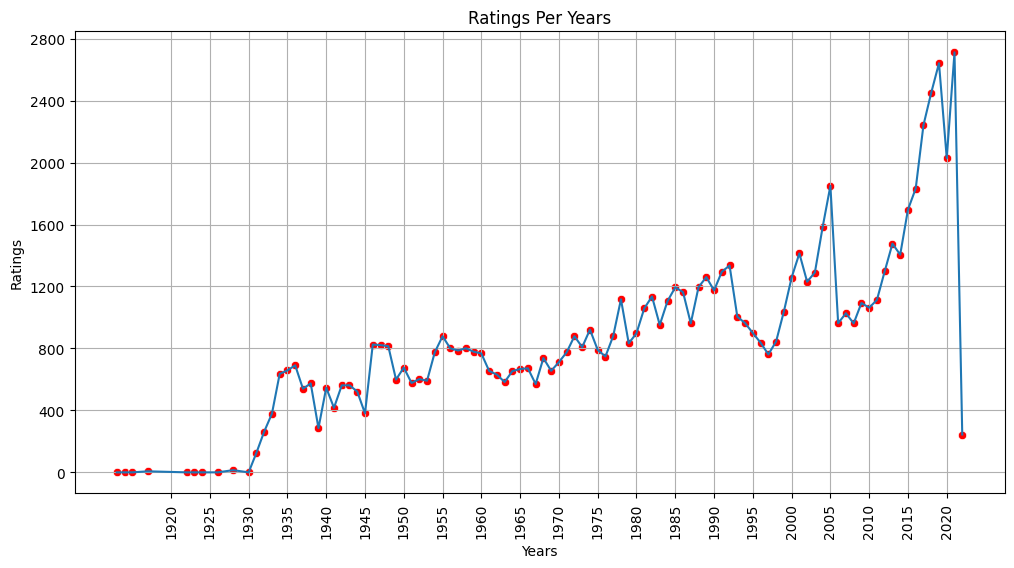

In [21]:
rating_sum=df.groupby('Year')['Rating'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_sum)
sns.scatterplot(x='Year',y='Rating',data=rating_sum,color='r')
plt.yticks(np.arange(0,3000,400))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Ratings')
plt.xlabel('Years')
plt.title('Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**Yearwith best average rating**

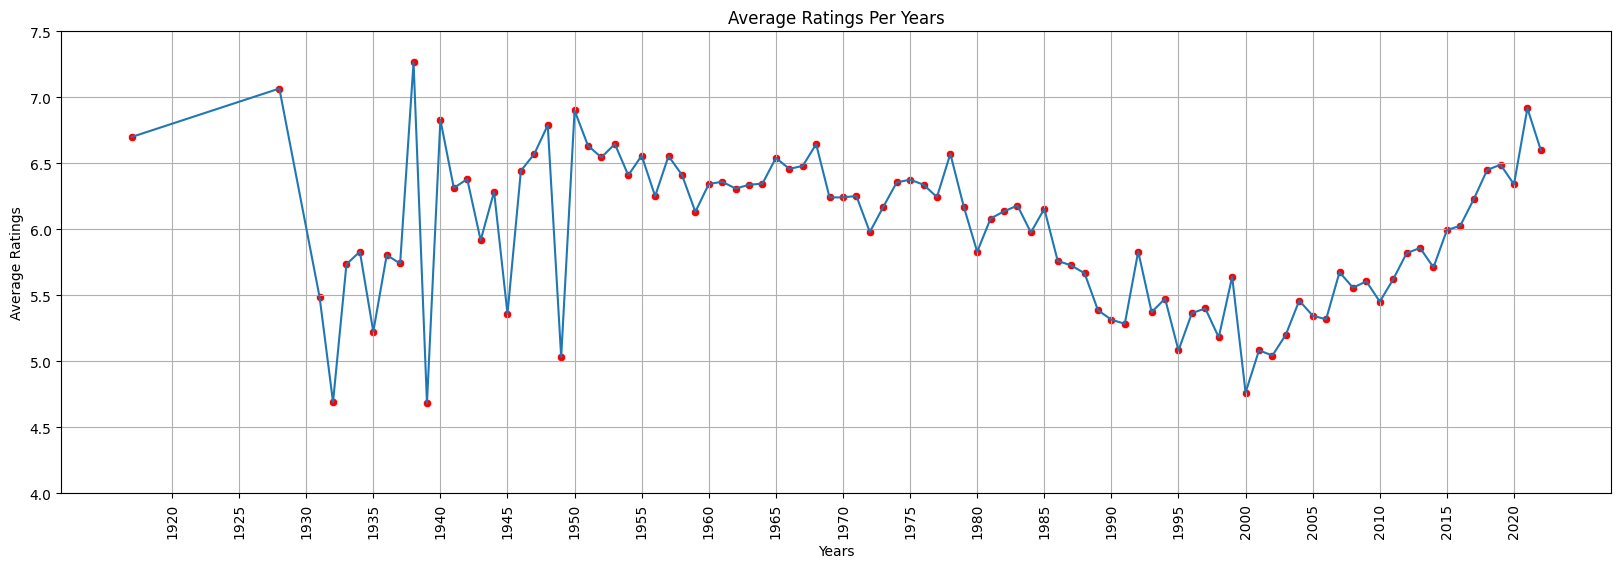

In [22]:
rating_avg=df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(20,6))
sns.lineplot(x='Year',y='Rating',data=rating_avg)
sns.scatterplot(x='Year',y='Rating',data=rating_avg,color='r')
plt.yticks(np.arange(4,8,0.5))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Ratings')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<ipython-input-24-44a87721c72c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Director', y='Name', data=df_top_20, palette='viridis')


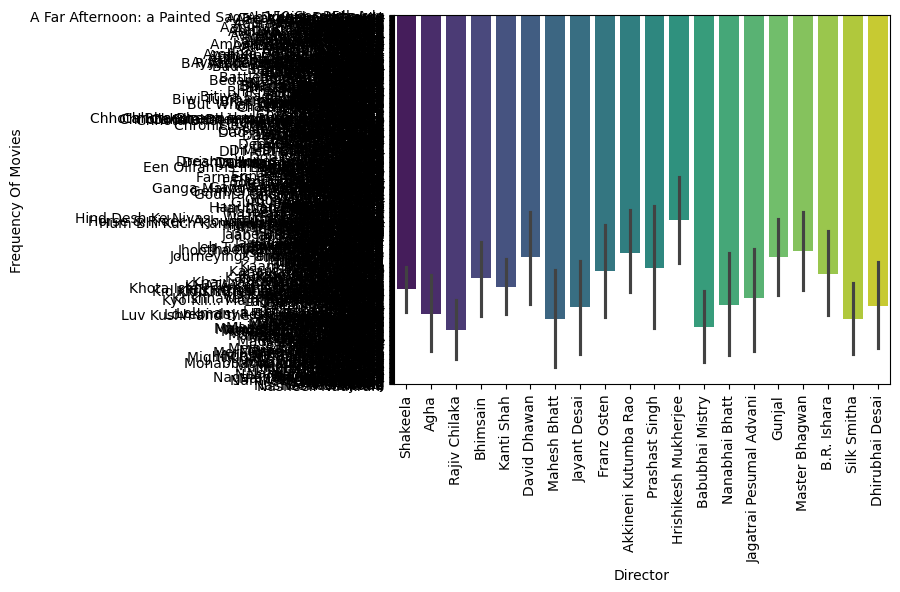

In [24]:
# Get the top 20 directors
top_20 = df.groupby('Director')['Name'].count().nlargest(20)

# Create a new DataFrame containing only the data for the top 20 directors
df_top_20 = df[df['Director'].isin(top_20.index)]

# Plot the barplot
sns.barplot(x='Director', y='Name', data=df_top_20, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Frequency Of Movies')
plt.xlabel('Director')
plt.show()


Correlation Of Duration And Rating is -0.07511162035794038


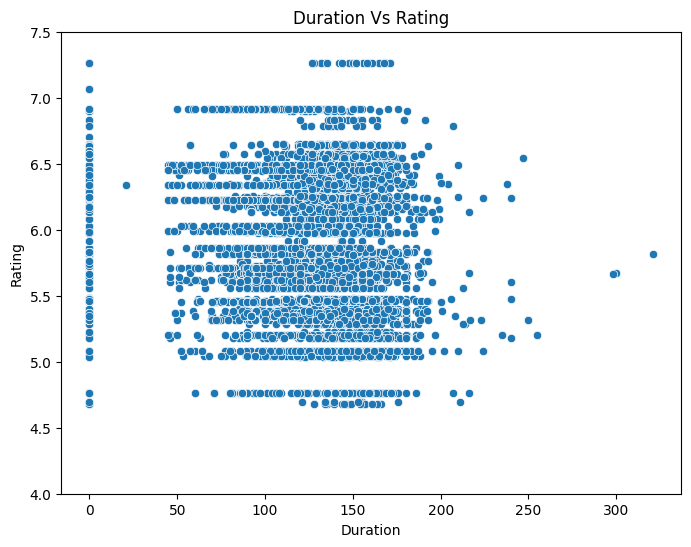

In [25]:
#Does length of movie have any impact with the rating
corr_leng_rat=df['Duration'].corr(df['Rating'])
print(f"Correlation Of Duration And Rating is {corr_leng_rat}")
#show there is no impact of duration on rating

plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration',y='Rating',data=df)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration Vs Rating')
plt.yticks(np.arange(4,8,0.5))
plt.show()

In [26]:
#Top 10 movies according to rating per year and overall.
overall=df.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 Movies Overall:")
overall

Top 10 Movies Overall:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Abhagin,1938,151,NaN,7.266085,9.555556,Prafulla Roy,Molina Devi,Prithviraj Kapoor,Vijay Kumar
1,Abhilasha,1938,134,NaN,7.266085,9.555556,Zia Sarhadi,Mahendra Thakore,M. Kumar,Bibbo
2,Adhikar,1938,132,NaN,7.266085,9.555556,P.C. Barua,P.C. Barua,Jamuna,Pahadi Sanyal
3,Baazigar,1938,152,NaN,7.266085,9.555556,Mohan Dayaram Bhavnani,K.L. Saigal,Ashok Kumar,Bibbo
4,Baghban,1938,159,Drama,7.266085,9.555556,Abdul Rashid Kardar,Bimla Kumari,B. Nandrekar,Sitara Devi
5,Bahadur Kisan,1938,0,NaN,7.266085,9.555556,Master Bhagwan,Chandrarao,Chandrarao,Hansa Wadkar
6,Ban Ki Chidiya,1938,0,Action,7.266085,9.555556,Jayant Desai,Madhuri,Eddie Billimoria,Ishwarlal
7,Banke Sanvaria,1938,0,NaN,7.266085,9.555556,Nanubhai Vakil,Navinchandra,Vatsala Kumthekar,Yasmin
8,Bhabi,1938,0,"Drama, Family",7.266085,9.555556,Franz Osten,Renuka Devi,Paidi Jairaj,Meera
9,Bhedi Trishul,1938,0,NaN,7.266085,9.555556,A.M. Khan,Ameena,Ansari,Kamia


In [28]:
rat_bool=df['Rating']>=6
vot_bool=df['Votes']>110
pop_df=df[vot_bool & rat_bool]
pop_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,6.489797,121.779116,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",6.917411,116.666667,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",6.489797,121.779116,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
15,102 Not Out,2018,102,"Comedy, Drama",6.450093,111.070175,Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz
20,12 Bulbule,2021,0,"Comedy, Drama, Family",6.917411,116.666667,Jagat Joon,Sonu Sonkar,Sunita Verman,Anubhav Dixit
...,...,...,...,...,...,...,...,...,...,...
15426,Zero,2018,164,"Comedy, Drama, Romance",6.450093,111.070175,Aanand L. Rai,Shah Rukh Khan,Anushka Sharma,Katrina Kaif
15479,Zindagi Tumse,2019,120,Family,6.489797,121.779116,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15480,Zindagi Unlimited,2021,105,NaN,6.917411,116.666667,Vipin Agnihotri,Amit Pandey,Kanchi Rohela,Kritika Sanghavi
15484,Zinga,2021,0,"Adventure, Fantasy, Sci-Fi",6.917411,116.666667,Jaishankar Chigurula,Sri Ram,Devan Sanjeev,Kasu Naveen Kumar


In [29]:
df.dropna(inplace=True)
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [30]:
def out(df,col,dis):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-(iqr*dis)
    upper=q3+(iqr*dis)
    return lower,upper

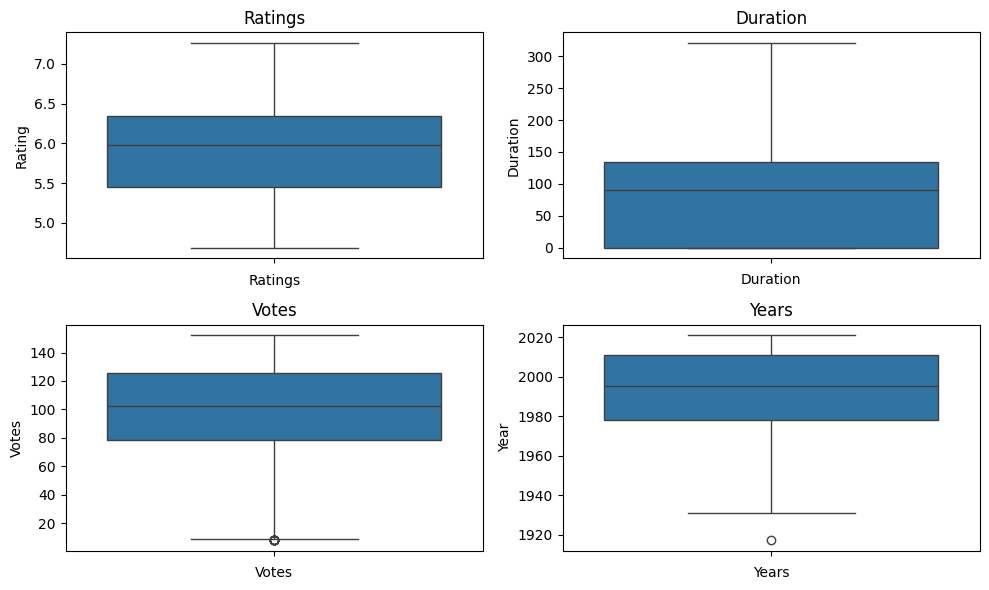

In [31]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,6))

sns.boxplot(data=df,y='Rating',ax=ax[0][0])
ax[0][0].set_title('Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=df,y='Duration',ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df,y='Votes',ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=df,y='Year',ax=ax[1][1])
ax[1][1].set_title('Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

In [32]:
votes_low,votes_up=out(df,'Votes',1.5)

In [33]:
vote_out_count=(df['Votes'] > votes_up) | (df['Votes'] < votes_low)

In [34]:
df['Votes'][vote_out_count].count()

12

In [35]:
df=df[(df['Votes']>votes_low) & (df['Votes']<votes_up)]

In [36]:
year_low,year_upper=out(df,'Year',1.5)

In [37]:
year_out_count=(df['Year']>year_upper) | (df['Year']<year_low)

In [38]:
df['Year'][year_out_count].count()

1

In [40]:
top_10_per_year = pd.DataFrame()
for year in df['Year'].unique():
    year_df = df[df['Year'] == year]
    top_10_year = year_df.nlargest(10, 'Rating').sort_values(by='Rating', ascending=False)
    top_10_per_year = pd.concat([top_10_per_year, top_10_year])

top_10_per_year = top_10_per_year.reset_index(drop=True)
print("\nTop 10 Movies Per Year:")
top_10_per_year



Top 10 Movies Per Year:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,Drama,6.489797,121.779116,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,2019,110,"Comedy, Romance",6.489797,121.779116,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,1978: A Teen Night Out,2019,107,Thriller,6.489797,121.779116,Aziz Zee,Abuzar Akhtar,Apurva Godbole,Vaishnavi Kadam
3,2 Band Radio,2019,0,Comedy,6.489797,121.779116,Saki Shah,Bilal Ahamad Bhagat,Neelu Dogra,Rahat Kazmi
4,22 Yards,2019,126,Sport,6.489797,121.779116,Mitali Ghoshal,Barun Sobti,Amartya Ray,Rajit Kapoor
...,...,...,...,...,...,...,...,...,...,...
892,Noor Jahan,1931,0,Drama,5.485714,43.333333,Ezra Mir,Vimala Vasishta,S.B. Nayampalli,Jillo
893,Shirin Farhad,1931,120,"Musical, Drama, Romance",5.485714,43.333333,J.J. Madan,Nissar,Jehanara Kajjan,Mohammed Hussain
894,The Light of the World,1931,124,"Drama, Fantasy",5.485714,43.333333,Ardeshir Irani,Master Vithal,Zubeida,Jillo
895,Veer Abhimanyu,1931,0,"Action, Adventure, Fantasy",5.485714,43.333333,Jillo,Jal Merchant,Sankatha,Baburao Sansare


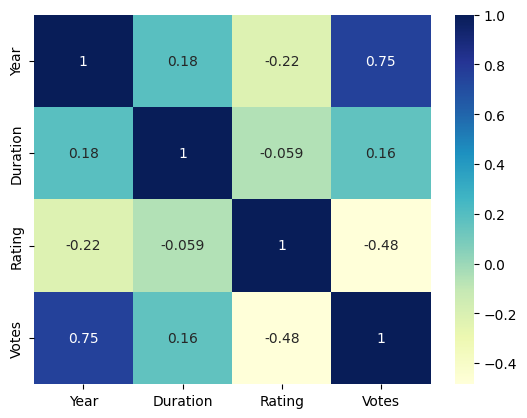

In [41]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot heatmap
sns.heatmap(numeric_df.corr(), cmap='YlGnBu', annot=True)
plt.show()


In [42]:
df=df[(df['Year']>year_low) &(df['Year']<year_upper)]
df.shape

(13071, 10)

In [43]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
df['Name']=LB.fit_transform(df['Name'])
df['Genre']=LB.fit_transform(df['Genre'])
df['Director']=LB.fit_transform(df['Director'])
df['Actor 1']=LB.fit_transform(df['Actor 1'])
df['Actor 2']=LB.fit_transform(df['Actor 2'])
df['Actor 3']=LB.fit_transform(df['Actor 3'])

<ipython-input-43-7eb858c56840>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name']=LB.fit_transform(df['Name'])
<ipython-input-43-7eb858c56840>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre']=LB.fit_transform(df['Genre'])
<ipython-input-43-7eb858c56840>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [44]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [45]:
from sklearn.model_selection import train_test_split
x=df.drop('Rating',axis=1)
y=df['Rating']

In [46]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
LR.fit(train_x,train_y)
pre_test=LR.predict(test_x)

In [48]:
pre_test

array([5.82987542, 6.41382353, 5.67212604, ..., 6.36162053, 5.60806166,
       5.64270887])

In [49]:
pre_train=LR.predict(train_x)

In [50]:
from sklearn.metrics import r2_score
score_test=r2_score(test_y,pre_test)
score_train=r2_score(train_y,pre_train)
print("print r2_score",score_test)
print('print r2_score',score_train)

print r2_score 0.28268982151446465
print r2_score 0.28562055717303203


In [51]:
from sklearn.linear_model import Ridge
RL=Ridge(alpha=10.0)
RL.fit(train_x,train_y)
RL_pre_test=RL.predict(test_x)
RL_pre_train=RL.predict(train_x)
r2_RL_test=r2_score(test_y,RL_pre_test)
r2_RL_train=r2_score(train_y,RL_pre_train)
print("print r2_score",r2_RL_test)
print('print r2_score',r2_RL_train)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, RL_pre_test)
print(mse)

print r2_score 0.28268980669528676
print r2_score 0.2856205571679612
0.1986624146060066


In [52]:
from sklearn.model_selection import GridSearchCV

param={'alpha':[0.01, 0.1, 1.0, 10.0]}
grid=GridSearchCV(estimator=RL,param_grid=param,cv=5)
grid.fit(train_x,train_y)

print(grid.best_params_,grid.best_estimator_)

{'alpha': 10.0} Ridge(alpha=10.0)


In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=10,random_state=42,shuffle=True)
cv=cross_val_score(RL,x,y,cv=kf,n_jobs=-1)
print('Accuracy : ',cv.mean()*100)

Accuracy :  28.34793737848798


In [54]:
from sklearn.model_selection import RepeatedKFold
rfk=RepeatedKFold(n_splits=10,random_state=42,n_repeats=5)
cv1=cross_val_score(RL,x,y,cv=rfk,n_jobs=-1)
print('Accuracy : ',cv1.mean()*100)

Accuracy :  28.32158694002126


In [55]:
from lightgbm import LGBMRegressor
LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(train_x, train_y)
lgbm_pre_test = LGBMR.predict(test_x)
lgbm_pre_train=LGBMR.predict(train_x)
r2_test_lgbm=r2_score(test_y,lgbm_pre_test)
r2_train_lgbm=r2_score(train_y,lgbm_pre_train)
print("print r2_score",r2_test_lgbm)
print('print r2_score',r2_train_lgbm)
mse_lgbm = mean_squared_error(test_y, RL_pre_test)
print(mse_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1825
[LightGBM] [Info] Number of data points in the train set: 9149, number of used features: 9
[LightGBM] [Info] Start training from score 5.901801
print r2_score 0.998065182471977
print r2_score 0.9996476557896125
0.1986624146060066


In [56]:
cv2=cross_val_score(LGBMR,x,y,cv=kf,n_jobs=-1)
print('Accuracy : ',cv2.mean()*100)

Accuracy :  99.94560042794672


In [57]:
cv3=cross_val_score(LGBMR,x,y,cv=rfk,n_jobs=-1)
print('Accuracy : ',cv3.mean()*100)

Accuracy :  99.93889351649881
